In [1]:
import matplotlib.pyplot as plt
import numpy as np

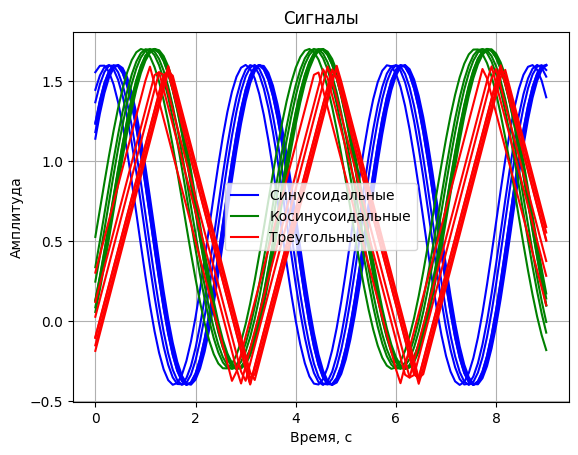

In [2]:
# индекс и отсчет времени в секундах
time_index = np.linspace(0, 9, 100)

tseries_list = {'Time': time_index}
d = np.random.random(size=10)

# количество образцов в каждом типе сигналов
N = 7 


f0 = 0.2

# косинусоидальный
for i in range(N):
    tseries_list["Tc"+str(i)] = -np.cos(3 * np.pi * f0 * time_index + 1.5 * d[i]) + 0.7

# синусоидальный 
for i in range(N):
    tseries_list["Ts"+str(i)] = -np.sin(2.2 * (time_index - 1.5) + 2 * d[i] - 13) + 0.6

# треугольный
for i in range(N):
    tseries_list["Tt"+str(i)] = 2 * np.abs((3 * f0 * time_index + 0.7 * d[i] + 0.7) % 2 - 1 ) - 0.4


# отрисовка всех сигналов

for i in range(N):
    if (i == 0):
        plt.plot(time_index, tseries_list["Ts"+str(i)], '-b', label="Синусоидальные")
    else:
        plt.plot(time_index, tseries_list["Ts"+str(i)], '-b')
for i in range(N):
    if (i == 0):
        plt.plot(time_index, tseries_list["Tc"+str(i)], '-g', label="Косинусоидальные")
    else:
        plt.plot(time_index, tseries_list["Tc"+str(i)], '-g')
for i in range(N):
    if (i == 0):
        plt.plot(time_index, tseries_list["Tt"+str(i)], '-r', label="Треугольные")
    else:
        plt.plot(time_index, tseries_list["Tt"+str(i)], '-r')
            
plt.title('Сигналы')
plt.legend()
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.grid()

In [3]:
def distance_matrix(x, y, q) -> np.array:
    """
    Функция  рассчета  матрицы  расстояний между точками двух рядов 
    """
    mdist = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            mdist[i,j] = np.abs((x[j]-y[i]))**q
    return mdist

In [4]:
def DTW(x, x_s, q=1, isDTW=True):
    '''
        x: первый ряд
        x_s : второй ряд
        q : степень для вычисления базового расстояния
    '''
    N = len(x) # Считаем, что ряды равной длины. Но это не всегда так, перепишите функцию для 
               # вычисления расстояния между рядами, длины которых не равны
    
    # если длины не равны, то выравниваем длины за счет интерполяции
    if len(x) != len(x_s):
        if len(x) < len(x_s):
            x = interp1d(np.linspace(0, 1, len(x)), x, kind="nearest")(np.linspace(0, 1, len(x_s)))
        else:
            x_s = interp1d(np.linspace(0, 1, len(x_s)) ,x_s, kind="nearest")(np.linspace(0, 1, len(x)))
    
    # Строим матрицу согласно реккурентной формуле, полученной выше. Матрица в нашем случае будет размерности 

    dist = distance_matrix(x, x_s, q=2)
    
    R = [[0] * (N+1) for i in range(N+1)]
   
    for i in range(1,N): 
        R[i][0] = dist[i,0] + R[i-1][0] 
        R[0][i] = dist[0,i] + R[0][i-1]
    
    # проверяем, что записалось
    #print("Начинаем заполнять матрицу R")
    #for i in range(N+1): 
    #    print(R[i])

    k = 0
    if isDTW:
        k = 1
    
    # начинаем расчет по реккурентной формуле
  
    for i in range(1,N+1): 
        for j in range(1,N+1):
            R[i][j] = dist[i-1,j-1] + k*np.min([R[i-1][j-1], R[i][j-1], R[i-1][j]]) 


    # ищем минимальный путь. Начинаем от нижнего правого угла.
    pth = []   # лист с кортежами индексов пути
    i = N
    j = N
    while i >= 0 and j >= 0:
        pth.append((i,j))
        if R[i][j-1] <= R[i-1][j-1] and R[i][j-1] <= R[i-1][j]:
            I = i
            J = j-1                
        
        if R[i-1][j] <= R[i-1][j-1] and R[i-1][j] <= R[i][j-1]:
            I = i - 1
            J = j 

        if R[i-1][j-1] <= R[i][j-1] and R[i-1][j-1] <= R[i-1][j]:
            I = i - 1
            J = j - 1
        
        i = I
        j = J
    
            

    #Считаем расстояние между двумя рядами
    s = 0
    for l in pth:
        s += R[l[0]][l[1]]
    s = s/len(pth) 

    return s, pth, R


In [5]:
# подсчет расстояний между экземплярами трех классов сигналов двумя методами
x = np.abs(tseries_list["Ts1"]) # с чем сравниваем (1 сигнал из синусоидального класса)

x_s = np.abs(tseries_list["Ts6"]) # что сравниваем (6 сигнал из синусоидального класса)
x_t = np.abs(tseries_list["Tt2"]) # что сравниваем (2 сигнал из треугольного класса)
x_c = np.abs(tseries_list["Tc4"]) # что сравниваем (4 сигнал из косинусоидального класса)

s1 = DTW(x, x_s, q=2)
s2 = DTW(x, x_t, q=2)
s3 = DTW(x, x_c, q=2)

print (f"DTW\nTs1 и Ts6 = {s1[0]}     Ts1 и Tt2 = {s2[0]}     Ts1 и Tc4 = {s3[0]}")

s11 = DTW(x, x_s, q=2, isDTW=False)
s21 = DTW(x, x_t, q=2, isDTW=False)
s31 = DTW(x, x_c, q=2, isDTW=False)

print (f"Dec\nTs1 и Ts6 = {s11[0]}     Ts1 и Tt2 = {s21[0]}     Ts1 и Tc4 = {s31[0]}")


DTW
Ts1 и Ts6 = 0.11826040005296563     Ts1 и Tt2 = 6.838178751547654     Ts1 и Tc4 = 1.3697072858003891
Dec
Ts1 и Ts6 = 0.002544994979100738     Ts1 и Tt2 = 0.15251117412213863     Ts1 и Tc4 = 0.1064805216546947


In [7]:
# переделываем датасет так, чтобы с ним можно было бы работать

x = []  # значения
Y = []  # целевая переменная

for v in tseries_list:
    if v!= 'Time':
        x.append(tseries_list[v])
        c = v[:-1]
        if c == "Ts":
            Y.append(0)
        elif c == "Tc":
            Y.append(1)
        else: Y.append(2)


arr = np.arange(len(Y))
np.random.shuffle(arr)


print(Y)

X_train = []
X_test = []
y_train = []
y_test = []
print(arr[:-5])
for i in arr[:-5]:
    X_train.append(x[i])
    y_train.append(Y[i])
print(arr[len(X_train):])
for i in arr[len(X_train):]:
    X_test.append(x[i])
    y_test.append(Y[i])


[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2]
[ 9 14 10 19 15  5 12 16 18 20  4  7  0  2 17  3]
[ 8  1  6 11 13]


In [8]:
from pyts.classification import KNeighborsClassifier

clf = KNeighborsClassifier(metric='dtw')
clf.fit(X_train, y_train)

print(f"Accuracy {clf.score(X_test, y_test)}")
print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[2].reshape(1, -1))}")
print(f"Истинный класс для предсказаний {y_test[2]}")

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 1


In [9]:
from pyts.classification import KNeighborsClassifier

clf = KNeighborsClassifier(metric='minkowski')
clf.fit(X_train, y_train)

print(f"Accuracy {clf.score(X_test, y_test)}")
print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[2].reshape(1, -1))}")
print(f"Истинный класс для предсказаний {y_test[2]}")

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 1


In [10]:
import numpy as np 
from pyts.classification import TimeSeriesForest
import matplotlib.pyplot as plt

 
clf = TimeSeriesForest(random_state=641)
clf.fit(X_train, y_train)


print(f"Accuracy {clf.score(X_test, y_test)}")
print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[2].reshape(1, -1))}")
print(f"Истинный класс для предсказаний {y_test[2]}")


Accuracy 1.0
Вектор вероятности принадлежности к классам [[0.104 0.772 0.124]]
Истинный класс для предсказаний 1
